# Polynomial Regression - Combined Cycle Power Plant

This example has the objective to demonstrate the use of a polynomial regression model to predict energy output based on exhaust vacuum.

# Dataset information

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.

## Attribute Information:

Features consist of hourly average ambient variables

- Temperature (AT) in the range 1.81°C and 37.11°C
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Net hourly electrical energy output (PE) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

# Libraries

In [1]:
import pandas as pd

import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Data

In [2]:
source = 'https://raw.githubusercontent.com/LucasKiraly/Datasets/main/CCPP.xlsx'

data = pd.read_excel(source)

data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Polynomial regression model

## Defining variables

In [3]:
X = data['V'].values

y = data['PE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Creating model

In [4]:
polynomial_features = PolynomialFeatures(degree = 5)

polynomial_features.fit(X_train.reshape(-1,1))

X_train_poly = polynomial_features.transform(X_train.reshape(-1,1))
X_test_poly = polynomial_features.transform(X_test.reshape(-1,1))

polynomial_regression = LinearRegression()

polynomial_regression.fit(X_train_poly, y_train)

y_pred = polynomial_regression.predict(X_test_poly)

## Defining coefficients of the equation

In [5]:
coef_a = polynomial_regression.coef_

coef_b =  polynomial_regression.intercept_

coefs = [['(1) Exhaust Vacuum', coef_a[1]],
         ['(2) Exhaust Vacuum', coef_a[2]],
         ['(3) Exhaust Vacuum', coef_a[3]],
         ['(4) Exhaust Vacuum', coef_a[4]],
         ['(5) Exhaust Vacuum', coef_a[5]],
         ['*Intercept', coef_b]]

df_equation = pd.DataFrame(coefs, 
                           columns = ['Parameter', 'Coefficient Value'])

df_equation

,Parameter,Coefficient Value
0,(1) Exhaust Vacuum,172.528173
1,(2) Exhaust Vacuum,-6.683146
2,(3) Exhaust Vacuum,0.124612
3,(4) Exhaust Vacuum,-0.001132
4,(5) Exhaust Vacuum,0.000004
5,*Intercept,-1223.755540


## Visualizing model

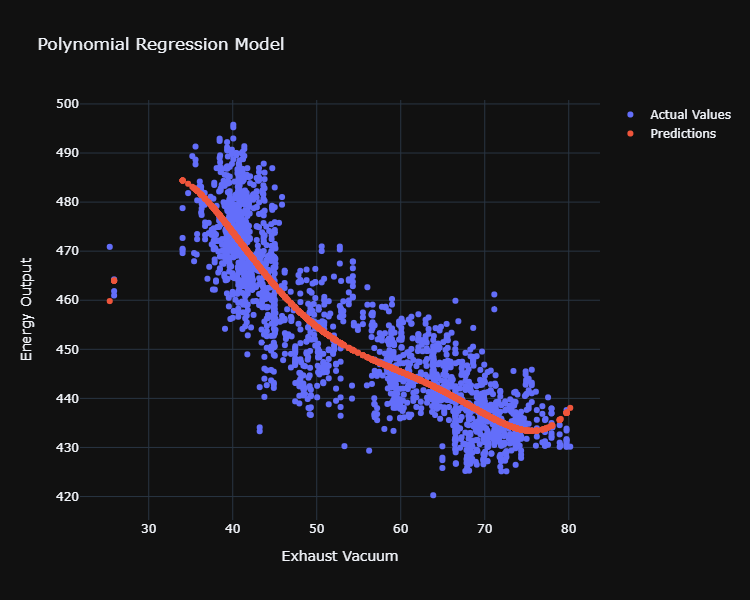

In [6]:
fig_model = go.Figure()

fig_model.add_trace(go.Scatter(x = X_test, 
                               y = y_test, 
                               mode = 'markers',
                               name = 'Actual Values'))

fig_model.add_trace(go.Scatter(x = X_test, 
                               y = y_pred, 
                               mode = 'markers',
                               name = 'Predictions'))

fig_model.update_layout(
    title_text = ('Polynomial Regression Model'),
    xaxis_title_text = 'Exhaust Vacuum',
    yaxis_title_text = 'Energy Output', 
    template = 'plotly_dark',
)

fig_model.show('png', width = 750, height = 600)

## Evaluating model

In [7]:
mae = mean_absolute_error(y_test, y_pred)

rsq = r2_score(y_test,y_pred)

ajusted_rsq = 1 - ((1 - rsq) * (len(y_test) - 1)) / (len(y_test) - X_test_poly.shape[1] - 1)

print('MAE: %.4f' %mae)

print('\nR²: %.4f' %rsq)

print('\nAjusted R²: %.4f' %ajusted_rsq)

MAE: 6.1640

R²: 0.7867

Ajusted R²: 0.7861
